## G-TAB example usage

When querying Google Trends, it outputs scores as integers in the range [0, 100]. These scores are relative.
For example, when we query Facebook (/m/02y1vz), Twitter (/m/0289n8t), and EPFL (/m/0jg7r) we get the following:

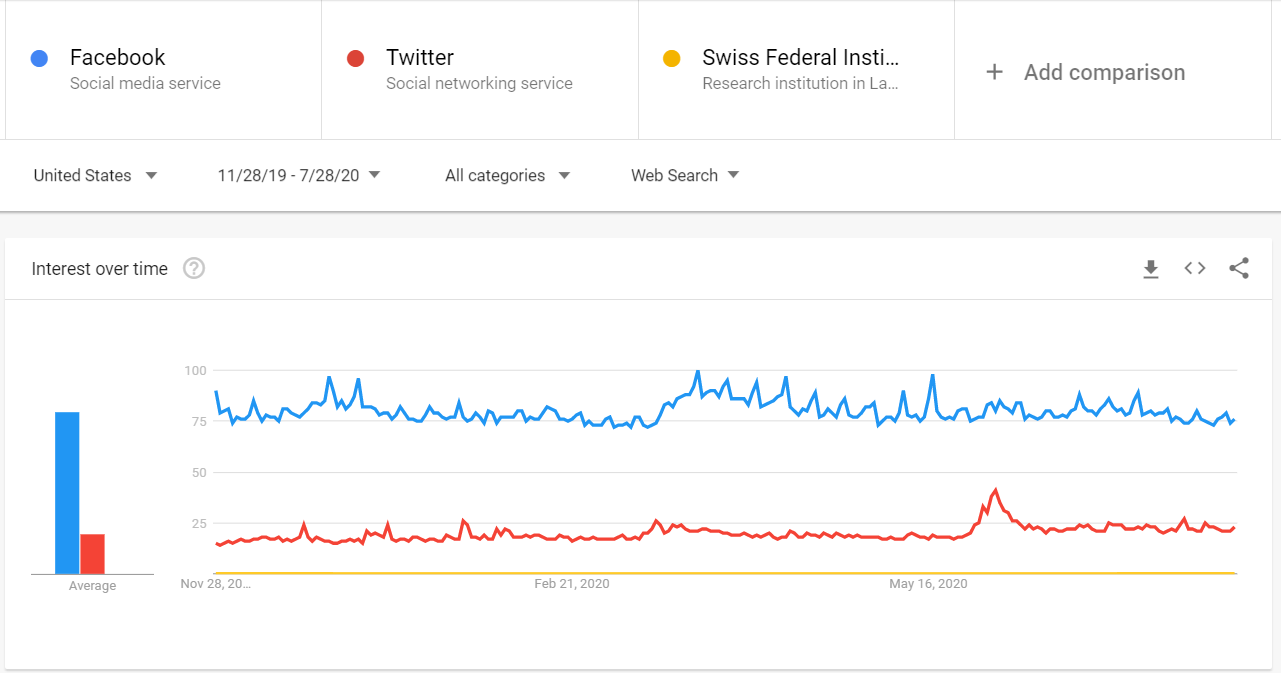

In [1]:
from IPython.display import display, Image
display(Image(filename='./imgs/fb_tw_ep.png'))

- If we want to compare the relative popularity of Facebook and Twitter, we can find adequate information in the Google Trends data. However, if we want to compare Facebook to EPFL there is no available information, as the difference in their popularity is vast. We get *<1*, which does not convey any information to us.
- Additionally, in this example we just used three keywords, but Google Trends limits us to five keywords per query, which means that if we want to compare more than five keywords we cannot obtain accurate data by just using Google Trends.

To solve both of these issues we can use **Google Trends AnchorBank (G-TAB)**! 

### Using G-TAB

#### Getting data for a new keyword with an existing G-TAB

In [2]:
!pip install gtab

In [3]:
import gtab

We need to create a GTAB object with the desired path. This will create and initialize the directory structure of my_path if it does not exist. If it does, it assumes we have already set up that directory for use.

In [4]:
my_path = "example_path"
t = gtab.GTAB(dir_path = my_path)

Directory already exists, loading data from it.
Using directory 'example_path'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv



There are three default G-TABs included in the package. To list the available G-TABs call:

In [5]:
t.list_gtabs()

Existing GTABs:
	google_anchorbank_geo=IT_timeframe=2019-11-28 2020-07-28.tsv
	google_anchorbank_geo=SE_timeframe=2019-11-28 2020-07-28.tsv
	google_anchorbank_geo=US_timeframe=2019-11-28 2020-07-28.tsv
	google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
Active anchorbank: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv


Now we need to select which G-TAB to use. This will automatically get the config options from the file. If we want to specify manual options, see the documentation (readme.md) on how to use *set_options*, or look at the G-TAB creation example below. To select which G-TAB to use, call:

In [6]:
t.set_active_gtab("google_anchorbank_geo=US_timeframe=2019-11-28 2020-07-28.tsv")

Active anchorbank changed to: google_anchorbank_geo=US_timeframe=2019-11-28 2020-07-28.tsv



Let's see what our G-TAB looks like:

In [7]:
t.anchor_bank_full

,max_ratio,max_ratio_lo,max_ratio_hi
google_query,,,
/m/0mgkg,6934.431097,6087.223074,7921.204349
/m/0289n8t,2357.706573,2100.091961,2653.603457
/m/081qc,801.620235,724.531726,888.957158
/m/0fp6w,304.615689,278.944715,333.358934
/m/01k17j,106.615491,99.025374,115.008832
/m/0b3lj,39.447732,37.134515,41.978224
/m/049qbg,15.384615,14.668133,16.161616
/m/06qyn0,7.692308,7.407407,8.000000
/m/04y_mn,1.000000,1.000000,1.000000


Now we can request a new query and calibrate it using our selected G-TAB!

In [8]:
mid = "/m/0jg7r" # freebase code for EPFl
nq_res= t.new_query(mid) 

Using example_path\output\google_anchorbanks\google_anchorbank_geo=US_timeframe=2019-11-28 2020-07-28.tsv
New query '/m/0jg7r'
New query calibrated!


Let's look at the ratios:

In [9]:
print(f'Ratio: {nq_res["max_ratio"]}')
print(f'Ratio low: {nq_res["max_ratio_lo"]}')
print(f'Ratio high: {nq_res["max_ratio_hi"]}')

Ratio: 1.4705882352941178
Ratio low: 1.4598540145985401
Ratio high: 1.4814814814814814


Let's look at the whole time series over the specified timeframe:

In [10]:
print(f'Timestamps: {nq_res["ts_timestamp"]}\n')
print(f'Time series max ratio: {nq_res["ts_max_ratio"]}\n')
print(f'Time series max ratio low: {nq_res["ts_max_ratio_lo"]}\n')
print(f'Time series max ratio high: {nq_res["ts_max_ratio_hi"]}\n')


Timestamps: ['2019-11-28 00:00:00', '2019-11-29 00:00:00', '2019-11-30 00:00:00', '2019-12-01 00:00:00', '2019-12-02 00:00:00', '2019-12-03 00:00:00', '2019-12-04 00:00:00', '2019-12-05 00:00:00', '2019-12-06 00:00:00', '2019-12-07 00:00:00', '2019-12-08 00:00:00', '2019-12-09 00:00:00', '2019-12-10 00:00:00', '2019-12-11 00:00:00', '2019-12-12 00:00:00', '2019-12-13 00:00:00', '2019-12-14 00:00:00', '2019-12-15 00:00:00', '2019-12-16 00:00:00', '2019-12-17 00:00:00', '2019-12-18 00:00:00', '2019-12-19 00:00:00', '2019-12-20 00:00:00', '2019-12-21 00:00:00', '2019-12-22 00:00:00', '2019-12-23 00:00:00', '2019-12-24 00:00:00', '2019-12-25 00:00:00', '2019-12-26 00:00:00', '2019-12-27 00:00:00', '2019-12-28 00:00:00', '2019-12-29 00:00:00', '2019-12-30 00:00:00', '2019-12-31 00:00:00', '2020-01-01 00:00:00', '2020-01-02 00:00:00', '2020-01-03 00:00:00', '2020-01-04 00:00:00', '2020-01-05 00:00:00', '2020-01-06 00:00:00', '2020-01-07 00:00:00', '2020-01-08 00:00:00', '2020-01-09 00:00:00'

#### Creating your own G-TAB

In [13]:
my_path = "example_path"
t = gtab.GTAB(dir_path = my_path)

Directory already exists, loading data from it.
Using directory 'example_path'


For example, if we want to construct a G-TAB with data from Germany between March 5th 2020 and May 5th 2020, we set:


In [14]:
t.set_options(pytrends_config = {"geo": "DE", "timeframe": "2020-03-05 2020-05-05"})

We also need to specify which file to use for sampling the keywords (if we're not using the default). This file needs to be located at *my_path/data/anchor_candidate_list.txt* and contains one keyword per line.

In [17]:
t.set_options(gtab_config = {"anchor_candidates_file": "anchor_candidate_list.txt"}) 

We then need to set N and K, as described in the paper. Choosing N and K depends on the anchor candidate data set we are using. N specifies how deep to go in the data set, i.e. take the first N keywords from the file for sampling. K specifies how many stratified samples we want to get. N has to be smaller than the total number of keywords in the anchor candidate data set, while it is good practice to set K to be in the range [0.1N, 0.2N]. For example, if we want to set N=3000 and K=500, we call:

In [18]:
t.set_options(gtab_config = {"num_anchor_candidates": 3000, "num_anchors": 500})

All of the config options can be directly edited in the config file found at my_path/config/config.json.

Finally, we construct the G-TAB:

In [57]:
t.create_anchorbank() # takes a while to run since it queries Google Trends.

This will start querying Google Trends and calibrate the data and will take some time, depending on K. After it is constructed it can be listed and selected as described in the previous example.